<a href="https://colab.research.google.com/github/orlandxrf/curso-dl/blob/main/notebooks/6b_FiltrosPopulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicación de filtros populares aplicados a Redes Convolucionales
![Forward](https://drive.google.com/uc?id=1tm_JSI5wdIK0eSAsX6ab1PJlY1exBKHc)

## Cargar y visualizar imagen

total 160K
-rw-r--r-- 1 root root  83K Feb 15 03:10 cat_small.jpg
-rw-r--r-- 1 root root  71K Feb 15 03:10 lcc_small.png
drwxr-xr-x 1 root root 4.0K Feb  1 14:32 sample_data
PNG
RGB
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x500 at 0x7F741306BDD0>


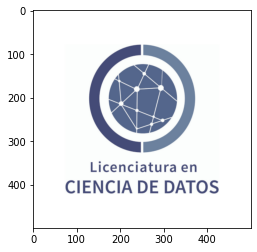

In [ ]:
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from IPython.display import display # para visualizar imágenes


urllib.request.urlretrieve('https://drive.google.com/uc?id=1QL7_A6Pa00VKWa4fbaxPdsEkobEPjp8h', "cat_small.jpg")
urllib.request.urlretrieve('https://drive.google.com/uc?id=1tm_JSI5wdIK0eSAsX6ab1PJlY1exBKHc', "lcc_small.png")

original_img = Image.open("lcc_small.png")
cat_img = Image.open("cat_small.jpg")

!ls -lh

# Output Images
plt.imshow(original_img)
  
# prints format of image
print(original_img.format)
  
# prints mode of image
print(original_img.mode)

print (f"{original_img}")


## Transformación y aplicación de filtro
*  Transformar la imagen a tensores y solo utilizar 1 canal para trabajar<br>
*  Definir el filtro a utilizar
*  Aplicar filtro
*  Visualizar la imagen


Tamaño de la imagen:	torch.Size([1, 500, 500])


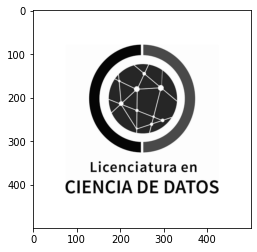

tensor_img.shape:	 torch.Size([500, 500])
vertical_edge_filter.shape:	 torch.Size([3, 3])

tensor_img:	torch.Size([1, 1, 500, 500])
vertical_edge_filter:	torch.Size([1, 1, 3, 3])

horizontal_edge_filter:	torch.Size([1, 1, 3, 3])

edge_filter:	torch.Size([1, 1, 3, 3])

sharpen_filter:	torch.Size([1, 1, 3, 3])

gaussian_filter:	torch.Size([1, 1, 3, 3])



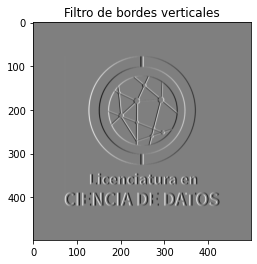

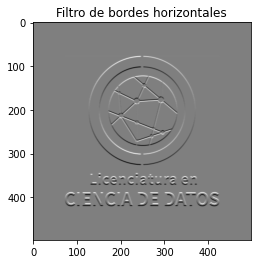

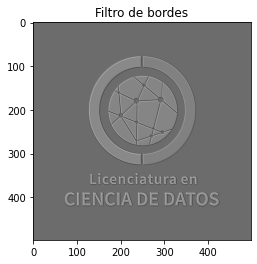

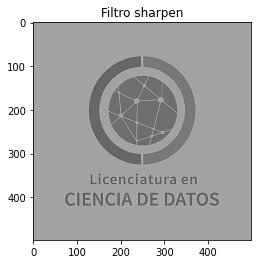

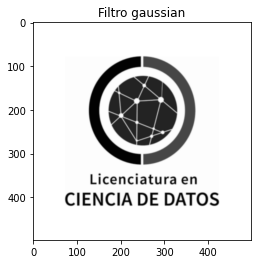

In [ ]:
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(0)

# ===============================================================================
# aplicar transformación a la imagen y seleccionar un canal de los tres disponibles
transform = torchvision.transforms.Compose([
  torchvision.transforms.Grayscale(num_output_channels=1),
  torchvision.transforms.ToTensor(),                                 
])

tensor_img = transform(original_img)
print (f"Tamaño de la imagen:\t{tensor_img.size()}")

# ===============================================================================
# visualizar imagen de un canal
# eliminar canal
tensor_img = tensor_img.squeeze()

plt.imshow(tensor_img, cmap="gray")
plt.show()

# ===============================================================================
#  definir filtro
# el siguiente filtro detecta bordes verticales

vertical_edge_filter = torch.tensor([
  [1, 0, -1],
  [1, 0, -1],
  [1, 0, -1],
], dtype=torch.float)

horizontal_edge_filter = torch.tensor([
  [1, 1, 1],
  [0, 0, 0],
  [-1, -1, -1],
], dtype=torch.float)

edge_filter = torch.tensor([
  [1, 1, 1],
  [1, -7, 1],
  [1, 1, -1],
], dtype=torch.float)

sharpen_filter = torch.tensor([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0],
], dtype=torch.float)

gaussian_filter = torch.tensor([
  [1, 2, 1],
  [2, 4, 2],
  [1, 2, 1],
], dtype=torch.float)

gaussian_filter *= 1/16

print (f"tensor_img.shape:\t {tensor_img.shape}")
print (f"vertical_edge_filter.shape:\t {vertical_edge_filter.shape}")

# ===============================================================================
# aplicar el filtro a la imagen por medio de la operación convolución

# (in_channels, out_channels, kernel_size, stride=1, padding=0)
tensor_img = tensor_img.unsqueeze(0).unsqueeze(0)
vertical_edge_filter = vertical_edge_filter.unsqueeze(0).unsqueeze(0)
horizontal_edge_filter = horizontal_edge_filter.unsqueeze(0).unsqueeze(0)
edge_filter = edge_filter.unsqueeze(0).unsqueeze(0)
sharpen_filter = sharpen_filter.unsqueeze(0).unsqueeze(0)
gaussian_filter = gaussian_filter.unsqueeze(0).unsqueeze(0)

print (f"\ntensor_img:\t{tensor_img.size()}")
print (f"vertical_edge_filter:\t{vertical_edge_filter.size()}\n")
print (f"horizontal_edge_filter:\t{horizontal_edge_filter.size()}\n")
print (f"edge_filter:\t{edge_filter.size()}\n")
print (f"sharpen_filter:\t{sharpen_filter.size()}\n")
print (f"gaussian_filter:\t{gaussian_filter.size()}\n")

img_vertical = F.conv2d(tensor_img, vertical_edge_filter)
img_horizontal = F.conv2d(tensor_img, horizontal_edge_filter)
img_edge = F.conv2d(tensor_img, edge_filter)
img_sharpen = F.conv2d(tensor_img, sharpen_filter)
img_gaussian = F.conv2d(tensor_img, gaussian_filter)

# print (img_vertical)
# print (f"img_vertical shape = {img_vertical.size()}")

# eliminar canal de entrada y canal de salida
img_vertical = img_vertical.squeeze().squeeze()
# print (f"img_vertical shape = {img_vertical.size()}")
img_horizontal = img_horizontal.squeeze().squeeze()
img_edge = img_edge.squeeze().squeeze()
img_sharpen = img_sharpen.squeeze().squeeze()
img_gaussian = img_gaussian.squeeze().squeeze()


plt.imshow(img_vertical, cmap="gray")
plt.title('Filtro de bordes verticales')
plt.show()
plt.title('Filtro de bordes horizontales')
plt.imshow(img_horizontal, cmap="gray")
plt.show()
plt.title('Filtro de bordes')
plt.imshow(img_edge, cmap="gray")
plt.show()
plt.title('Filtro sharpen')
plt.imshow(img_sharpen, cmap="gray")
plt.show()
plt.title('Filtro gaussian')
plt.imshow(img_gaussian, cmap="gray")
plt.show()

Tamaño de la imagen:	torch.Size([3, 450, 800])


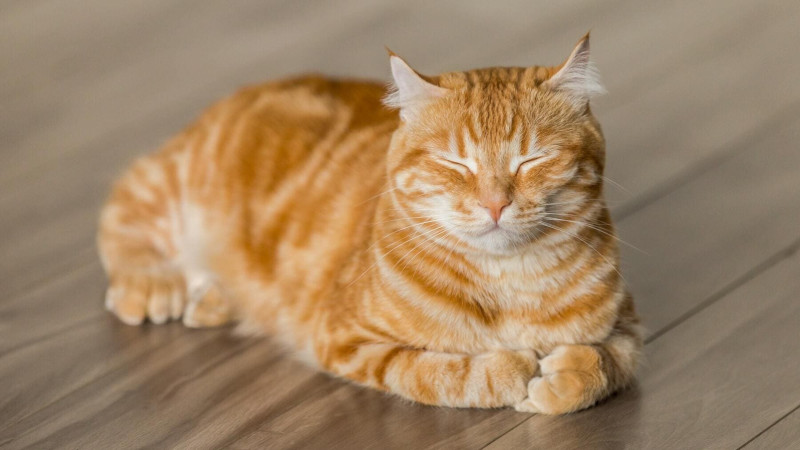

tensor_img.shape:	 torch.Size([3, 450, 800])
vertical_edge_filter.shape:	 torch.Size([3, 3, 3])

tensor_img:	torch.Size([1, 3, 450, 800])
vertical_edge_filter:	torch.Size([1, 3, 3, 3])

horizontal_edge_filter:	torch.Size([1, 3, 3, 3])

edge_filter:	torch.Size([1, 3, 3, 3])

sharpen_filter:	torch.Size([1, 3, 3, 3])

gaussian_filter:	torch.Size([1, 3, 3, 3])

img_vertical shape = torch.Size([1, 1, 448, 798])
img_gaussian shape = torch.Size([1, 1, 448, 798])
img_vertical shape = torch.Size([448, 798])
img_gaussian shape = torch.Size([448, 798])


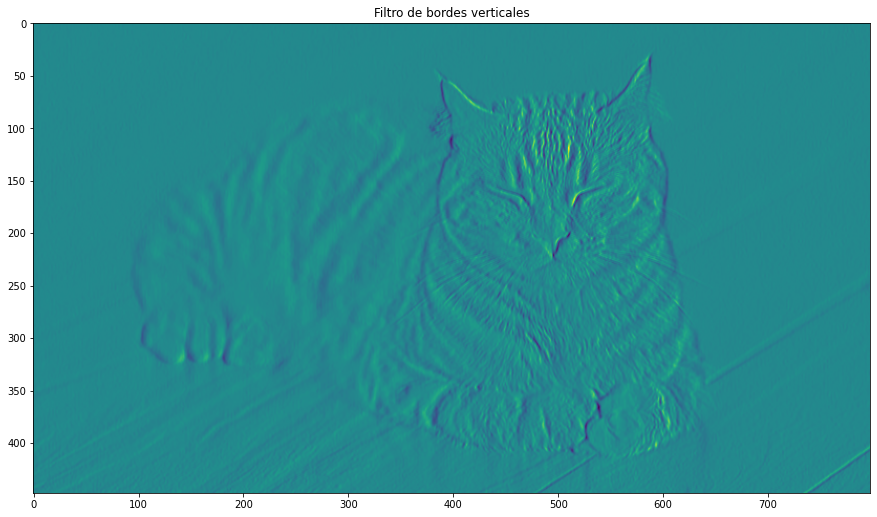

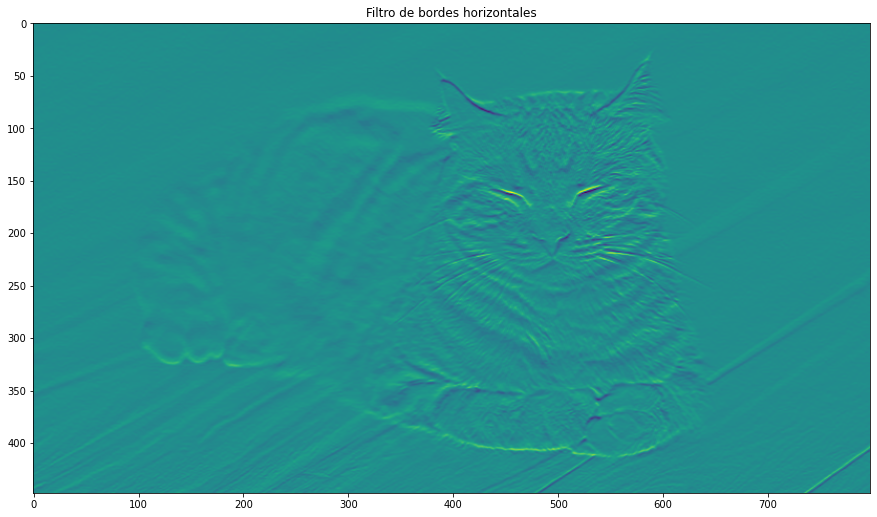

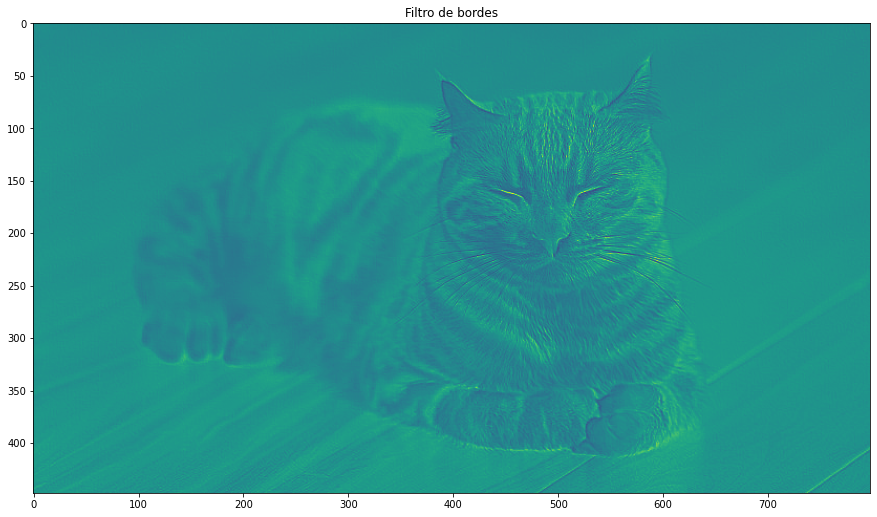

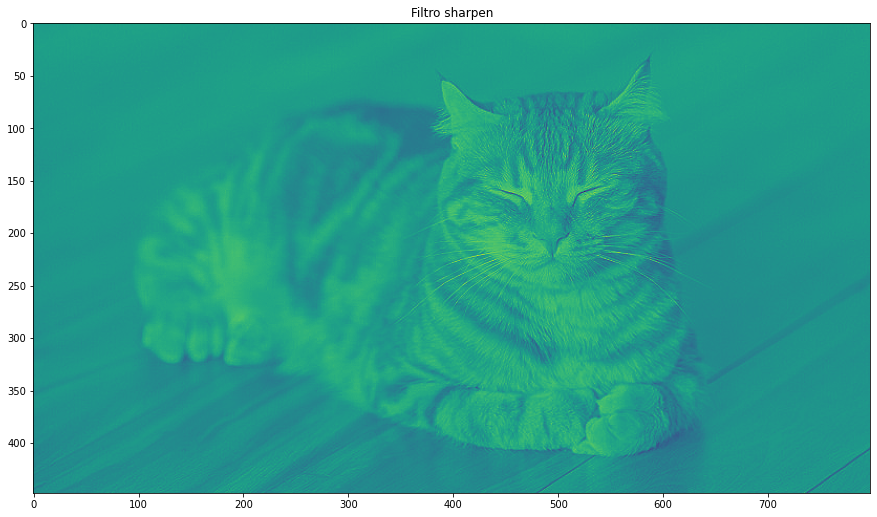

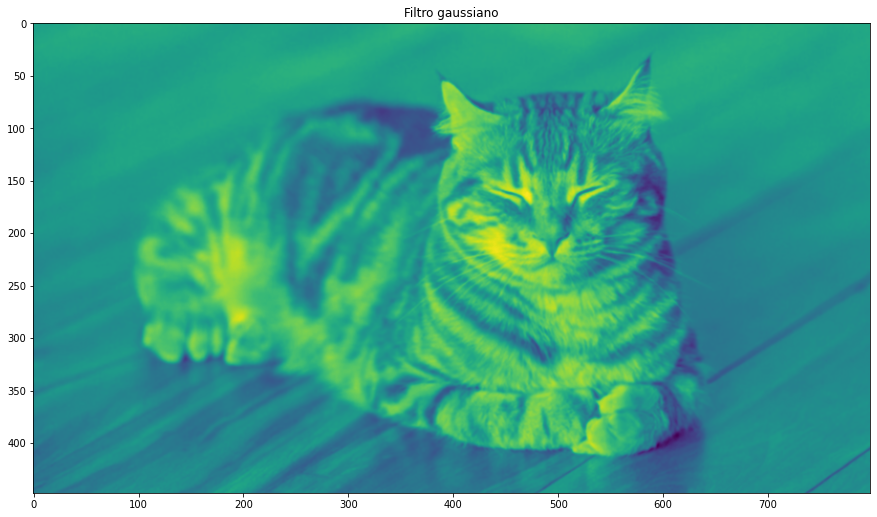

In [ ]:
# ===============================================================================
# aplicar transformación a la imagen y seleccionar un canal de los tres disponibles
transform = torchvision.transforms.Compose([
  # torchvision.transforms.Grayscale(num_output_channels=1),
  torchvision.transforms.ToTensor(),                                 
])

tensor_img = transform(cat_img)

print (f"Tamaño de la imagen:\t{tensor_img.size()}")

# print (tensor_img)

# ===============================================================================
# visualizar imagen

img = torchvision.transforms.ToPILImage()(tensor_img)


display(img)
# plt.imshow(tensor_img)
# plt.show()

# ===============================================================================
#  definir los filtros

vertical_edge_filter = torch.tensor([
  [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
  ],
  [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
  ],
 [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
  ],
], dtype=torch.float)

horizontal_edge_filter = torch.tensor([
  [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1],
  ],
  [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1],
  ],
  [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1],
  ],
], dtype=torch.float)

edge_filter = torch.tensor([
  [
    [1, 1, 1],
    [1, -7, 1],
    [1, 1, -1],
  ],
  [
    [1, 1, 1],
    [1, -7, 1],
    [1, 1, -1],
  ],
  [
    [1, 1, 1],
    [1, -7, 1],
    [1, 1, -1],
  ],
], dtype=torch.float)

sharpen_filter = torch.tensor([
  [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0],
  ],
  [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0],
  ],
  [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0],
  ],
], dtype=torch.float)

gaussian_filter = torch.tensor([
  [
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
  ],
  [
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
  ],
 [
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
  ],
], dtype=torch.float)

gaussian_filter *= 1/16

print (f"tensor_img.shape:\t {tensor_img.shape}")
print (f"vertical_edge_filter.shape:\t {vertical_edge_filter.shape}")

# ===============================================================================
# aplicar el filtro a la imagen por medio de la operación convolución

# (in_channels, out_channels, kernel_size, stride=1, padding=0)
tensor_img = tensor_img.unsqueeze(0)
vertical_edge_filter = vertical_edge_filter.unsqueeze(0)
horizontal_edge_filter = horizontal_edge_filter.unsqueeze(0)
edge_filter = edge_filter.unsqueeze(0)
sharpen_filter = sharpen_filter.unsqueeze(0)
gaussian_filter = gaussian_filter.unsqueeze(0)

print (f"\ntensor_img:\t{tensor_img.size()}")
print (f"vertical_edge_filter:\t{vertical_edge_filter.size()}\n")
print (f"horizontal_edge_filter:\t{horizontal_edge_filter.size()}\n")
print (f"edge_filter:\t{edge_filter.size()}\n")
print (f"sharpen_filter:\t{sharpen_filter.size()}\n")
print (f"gaussian_filter:\t{gaussian_filter.size()}\n")

img_vertical = F.conv2d(tensor_img, vertical_edge_filter)
img_horizontal = F.conv2d(tensor_img, horizontal_edge_filter)
img_edge = F.conv2d(tensor_img, edge_filter)
img_sharpen = F.conv2d(tensor_img, sharpen_filter)
img_gaussian = F.conv2d(tensor_img, gaussian_filter)

# print (img_vertical)
print (f"img_vertical shape = {img_vertical.size()}")
print (f"img_gaussian shape = {img_gaussian.size()}")

# eliminar canal de entrada y canal de salida
img_vertical = img_vertical.squeeze()
print (f"img_vertical shape = {img_vertical.size()}")
img_horizontal = img_horizontal.squeeze()
img_edge = img_edge.squeeze()
img_sharpen = img_sharpen.squeeze()
img_gaussian = img_gaussian.squeeze()
print (f"img_gaussian shape = {img_gaussian.size()}")


plt.figure(figsize=(15,20))
plt.imshow(img_vertical)
plt.title('Filtro de bordes verticales')
plt.show()

plt.figure(figsize=(15,20))
plt.imshow(img_horizontal)
plt.title('Filtro de bordes horizontales')
plt.show()

plt.figure(figsize=(15,20))
plt.imshow(img_edge)
plt.title('Filtro de bordes')
plt.show()

plt.figure(figsize=(15,20))
plt.imshow(img_sharpen)
plt.title('Filtro sharpen')
plt.show()

plt.figure(figsize=(15,20))
plt.imshow(img_gaussian)
plt.title('Filtro gaussiano')
plt.show()

# print ('\nFiltro de bordes verticales')
# img_vertical = torchvision.transforms.ToPILImage()(img_vertical)
# display(img_vertical)

# print ('\nFiltro de bordes horizontales')
# img_horizontal = torchvision.transforms.ToPILImage()(img_horizontal)
# display(img_horizontal)

# print ('\nFiltro de bordes')
# img_edge = torchvision.transforms.ToPILImage()(img_edge)
# display(img_edge)

# print ('\nFiltro sharpen')
# img_sharpen = torchvision.transforms.ToPILImage()(img_sharpen)
# display(img_sharpen)

# print ('\nFiltro gaussian')
# img_gaussian = torchvision.transforms.ToPILImage()(img_gaussian)
# display(img_gaussian)